# 6. Componentes Pricipales y K-Means

Realicemos una predicción basada en Análisis de componentes principales (PCA).

La base de datos a analizar será la de Peliculas IMDB.

Esta técnica sirve para reducir la dimensionalidad de un conjunto de datos (busca la proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados). Es decir, convierte un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal llamadas componentes principales.

Partiendo de una contrucción del modelo, haremos un proceso iterativo de validación y ajuste del mismo (modificando parámetros y variables), hasta obtener el que mejor predice nuestra target, sin infra o sobreajustes

## Importación de datos y selección de variables


In [2]:
#Librerías a usar

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

#Importación de datos
movie = pd.read_csv("data/movies/movie_metadata.csv") 

# print a summary of the data in Melbourne data
movie.describe()


num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [3]:
movie.shape

(5043, 28)

In [4]:
movie.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

### Filtrar variables significativas y limpieza

Tenemos variables categóricas y otras numéricas, que deberemos analizar de manera diferenciada. Analizaremos hasta que punto hay variables dependientes y por otro lado, cuales no podemos elegir porque los datos no son consistentes (muchos vacios o valores incoherentes)


In [5]:
# Eliminación de NAs (por valores nulos)
movie = movie.fillna(value=0, axis=1)
movie.shape

(5043, 28)

In [6]:
# Estandarización de datos
# Datos categoricos
str_list = [] # lista con las columnas con strings
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Datos numéricos  
num_list = movie.columns.difference(str_list) 
movie_num = movie[num_list]
movie_num.head()

actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
0                  1000.0                   936.0                   855.0   
1                 40000.0                  5000.0                  1000.0   
2                 11000.0                   393.0                   161.0   
3                 27000.0                 23000.0                 23000.0   
4                   131.0                    12.0                     0.0   

   aspect_ratio       budget  cast_total_facebook_likes  \
0          1.78  237000000.0                       4834   
1          2.35  300000000.0                      48350   
2          2.35  245000000.0                      11700   
3          2.35  250000000.0                     106759   
4          0.00          0.0                        143   

   director_facebook_likes  duration  facenumber_in_poster        gross  \
0                      0.0     178.0                   0.0  760505847.0   
1                    563.0     169.0                   0.0  309404152.0   
2                      0.0     148.0                   1.0  200074175.0   
3                  22000.0     164.0                   0.0  448130642.0   
4                    131.0       0.0                   0.0          0.0   

   imdb_score  movie_facebook_likes  num_critic_for_reviews  \
0         7.9                 33000                   723.0   
1         7.1                     0                   302.0   
2         6.8                 85000                   602.0   
3         8.5                164000                   813.0   
4         7.1                     0                     0.0   

   num_user_for_reviews  num_voted_users  title_year  
0                3054.0           886204      2009.0  
1                1238.0           471220      2007.0  
2                 994.0           275868      2015.0  
3                2701.0          1144337      2012.0  
4                   0.0                8         0.0

In [7]:
#Normalización de los datos
X = movie_num.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Veamos como se comporta

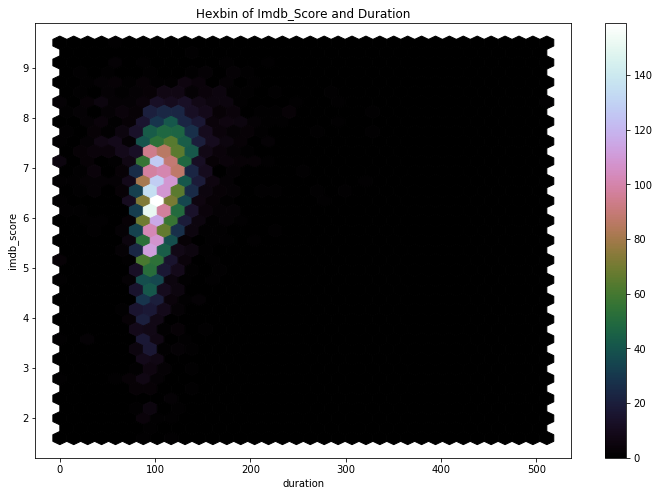

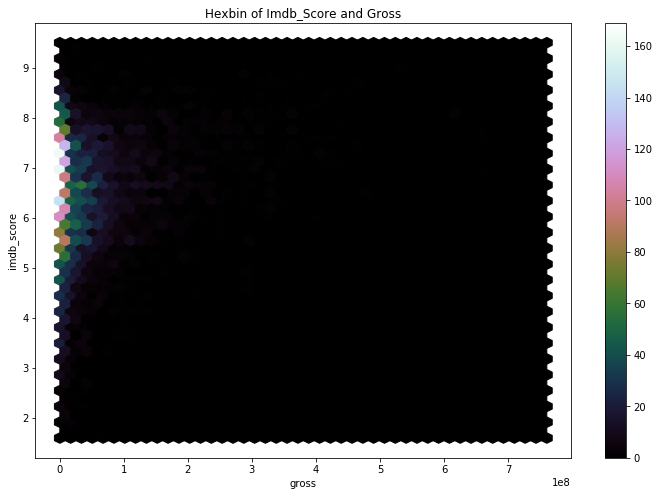

In [8]:
movie.plot(y= 'imdb_score', x ='duration',kind='hexbin',
           gridsize=35, sharex=False, colormap='cubehelix', 
           title='Hexbin of Imdb_Score and Duration',
           figsize=(12,8))


movie.plot(y= 'imdb_score', x ='gross',kind='hexbin',
           gridsize=45, sharex=False, colormap='cubehelix', 
           title='Hexbin of Imdb_Score and Gross',
           figsize=(12,8))

# No se que se ve!!

### Relación entre las variables

Haremos primero un mapa de calor que nos permite establecer una matriz de correlación a ver si las variables resultan o no independientes. Esto es útil porque un modelo, cuanto más sencillo es (en el sentido de no tener 2 variables que indican lo mismo), mejor resulta.



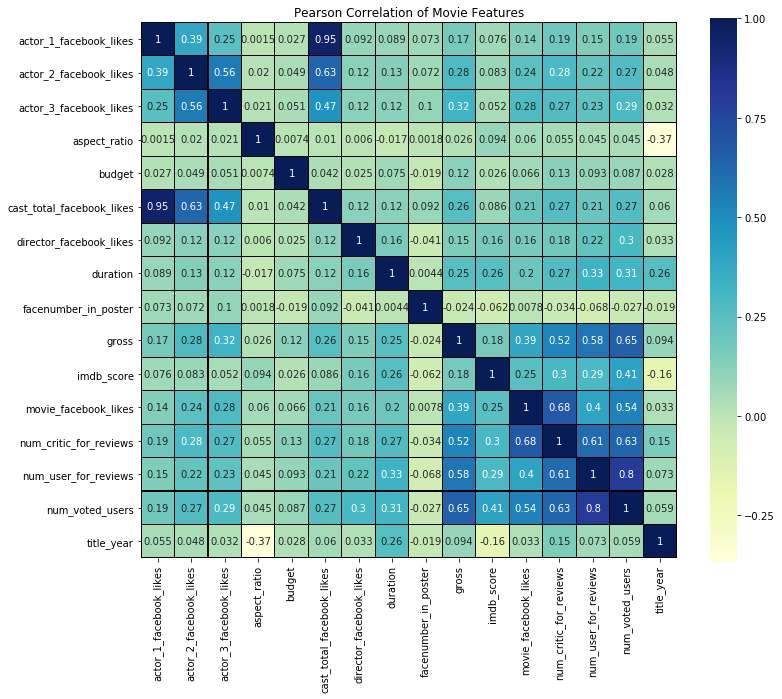

In [10]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(),
            linewidths=0.25,vmax=1.0, square=True, 
            cmap="YlGnBu", linecolor='black', annot=True)

Vemos que viertas variables están muy relacionadas (por ejemplo el número de likes en facebook de actores y del actor principal, lógico)
Es necesario ralizar por tanto un PCA, analisis de componentes principales, donde encontremos esa correlación lienal entre las variables

Nota: se sigue el método de cálculo de http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html


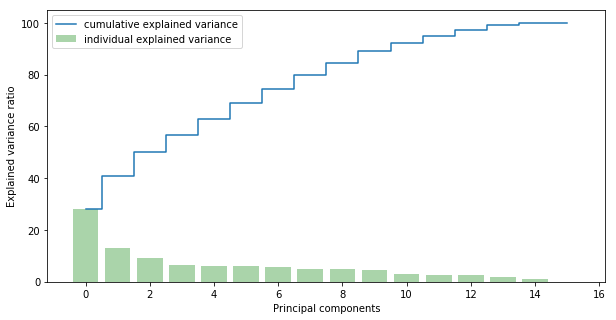

In [13]:
# Calculo de Eigenvectors - eigenvalues de matriz de Covarianza
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


Basicamente, esto lo que indica es que un 80% de la varianza es atribuible a 8 variables. La teoría dice que hay que coger un rato del 95%, lo que sería en este caso 12 componentes
Vamos a aplicar PCA

## Análisis de componentes principales

Se realiza con el modulo PCA de sklearn.

In [14]:
pca = PCA(n_components=12)
x_12d = pca.fit_transform(X_std)

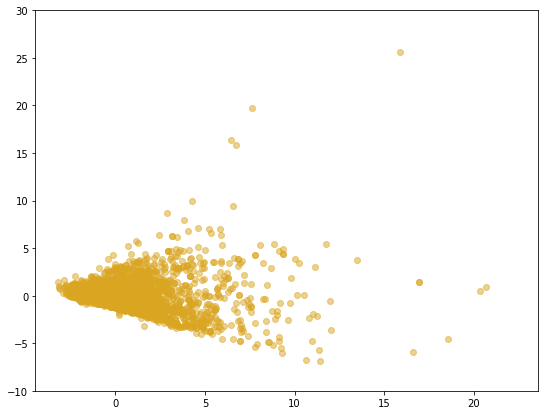

In [16]:
#Representación de dos de esas variables
plt.figure(figsize = (9,7))
plt.scatter(x_12d[:,0],x_12d[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

No se observa ningún cluster entre estas dos, de todas formas habíamos cogido 12, así que veamos si por KMeans encontramos algo

## Cluster con Kmeans

Partimos de los datos obtenidos con el PCA. Se utilizará el modulo KMeans() de sklearn aplicado con 3 clusters.

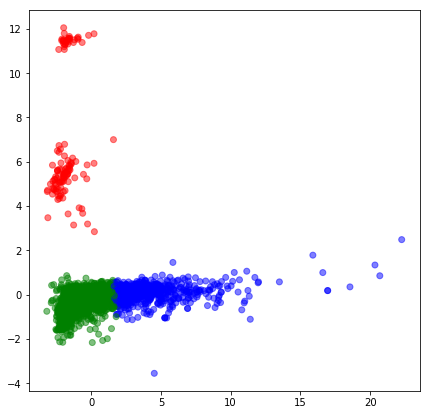

In [18]:
# Cluster de 3 KMeans 
kmeans = KMeans(n_clusters=3)
X_clustered = kmeans.fit_predict(x_12d)

# visualización ( seleccionamos 3 colores )
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot
plt.figure(figsize = (7,7))
plt.scatter(x_12d[:,0],x_12d[:,2], c= label_color, alpha=0.5) 
plt.show()


Algo se ve, no obstante, tenemos solo la representación de dos variables (y teníamos seleccionadas 12), así que

/root/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/root/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


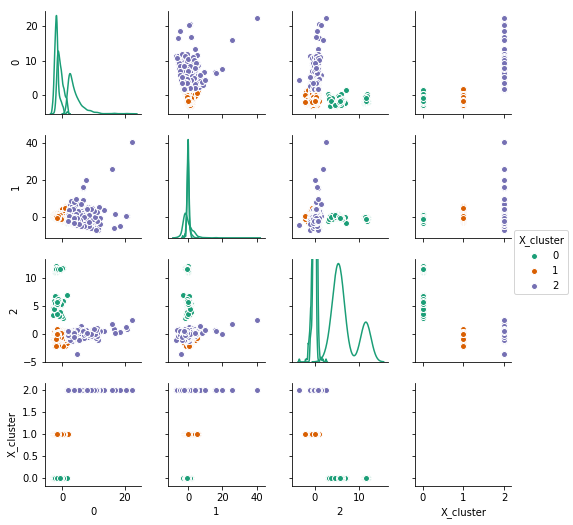

In [20]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_12d)
df = df[[0,1,2]] 
# only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)
